In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

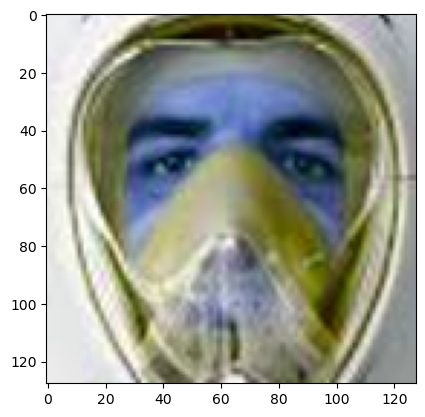

In [2]:
datadir = 'C:/Users/Vishaak/Downloads/face_mask/Dataset'
categories = ["without_mask","with_mask"]

for category in categories:
    path = os.path.join(datadir, "with_mask")
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

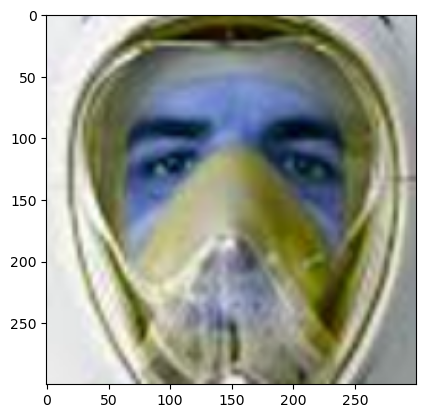

In [3]:
img_size = 300

new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array)
plt.show()

In [39]:
training_data = []

def create_train_data():
    
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        count = 0
        if(class_num == 0):
            for img in os.listdir(path):
                if(count<2800):
                    try:
                        img_array = cv2.imread(os.path.join(path,img))
                        new_array = cv2.resize(img_array,(img_size,img_size))
                        training_data.append([new_array,class_num])
                        count+=1
                    except Exception as e:
                        pass
        else:
            for img in os.listdir(path):
                if(count<2000):
                    try:
                        img_array = cv2.imread(os.path.join(path,img))
                        new_array = cv2.resize(img_array,(img_size,img_size))
                        training_data.append([new_array,class_num])
                        count+=1
                    except Exception as e:
                        pass
            
                
            
create_train_data()
            
training_data          

[[array([[[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [252, 253, 251],
          [252, 253, 251],
          [252, 253, 251]],
  
         [[254, 254, 254],
          [254, 254, 254],
          [253, 253, 253],
          ...,
          [252, 253, 251],
          [252, 253, 251],
          [252, 253, 251]],
  
         [[253, 253, 253],
          [253, 253, 253],
          [253, 253, 253],
          ...,
          [253, 254, 252],
          [253, 254, 252],
          [253, 254, 252]],
  
         ...,
  
         [[131, 152, 175],
          [134, 154, 178],
          [141, 160, 185],
          ...,
          [ 92,  99, 130],
          [ 89,  98, 129],
          [ 88,  98, 128]],
  
         [[118, 139, 164],
          [121, 141, 166],
          [128, 148, 173],
          ...,
          [ 91, 100, 130],
          [ 89,  99, 129],
          [ 88,  99, 129]],
  
         [[114, 135, 160],
          [116, 137, 162],
          [124, 144, 170

In [25]:
print(len(training_data))

4800


In [19]:
import random
random.shuffle(training_data)


In [20]:
for sam in training_data[:5]:
    print(sam[1])
    

1
1
0
0
1


In [38]:
training_data[0][1]

0

In [37]:

x = np.array(training_data[:][0])
y = np.array(training_data[:][1])

x/=255

x = x.reshape(-1,img_size,img_size,3)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Activation, BatchNormalization

model = Sequential()

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

model.fit(x,y,batch_size = 10,validation_split = 0.2,epochs=3)

In [ ]:
test_path = os.path.join('C:/Users/Vishaak/Downloads/face_mask/Dataset/without_mask','2009.png')
test_img = cv2.imread(test_path)
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img, (img_size,img_size))
t_img = test_img.reshape(1,img_size,img_size,3)
model.predict(t_img)


In [ ]:
test_path_2 = os.path.join('C:/Users/Vishaak/Downloads','mask_test_1.jpg') 
test_img_2 = cv2.imread(test_path_2)
plt.imshow(test_img_2)

In [ ]:
test_img_2 = cv2.resize(test_img_2,(img_size,img_size))
t_img_2 = test_img_2.reshape(1,img_size,img_size,3)
model.predict(t_img_2)

In [ ]:
test_path_2 = os.path.join('C:/Users/Vishaak/Downloads','mask_test_2.jpg') 
test_img_2 = cv2.imread(test_path_2)
plt.imshow(test_img_2)

In [ ]:
test_img_2 = cv2.resize(test_img_2,(img_size,img_size))
t_img_2 = test_img_2.reshape(1,img_size,img_size,3)
model.predict(t_img_2)

In [ ]:
model.save("mask_detector.model")